# <font color='blue'> Atividade 1

### Pergunta 1:
##### Qual o objetivo do algoritmo K-Means?
    
### Pergunta 2:
##### O algoritmo K-Means é baseado em qual tipo de aprendizagem?

In [ ]:
# Para entender melhor K-means  ->  https://lamfo-unb.github.io/2017/10/05/Introducao_basica_a_clusterizacao/

### Pergunta 3: 
##### Considerando o dataset gerado a partir das instruções do enunciado, qual das imagens representa o gráfico correto?

In [4]:
from math import sqrt   # importanto raiz quadrada da biblioteca de matemática
from matplotlib import pyplot as plt   # biblioteca que gera gráfico
from sklearn.datasets import make_blobs   # gera grupos para agrupamento
from sklearn.cluster import KMeans  # encontra clusters diferentes

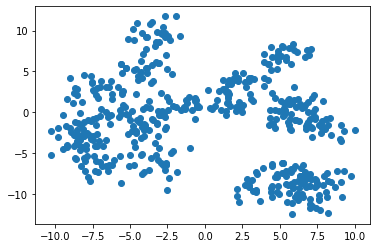

In [10]:
# Esse gráfico é a resposta da pergunta 3 #

X, y = make_blobs(n_samples=500, centers=20, random_state=999)   # X é a posição no plano cartesiano, y grupo que X pertence
plt.scatter(X[:,0], X[:,1])   # representando o gráfico
plt.show() # chama o gráfico

In [7]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 1, wcss[0]
    x2, y2 = 19, wcss[len(wcss)-1]
    distances = []
    for i in range(len(wcss)):
        x0 = i + 1
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 1

In [8]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
n = optimal_number_of_clusters(wcss)
print(n)

4


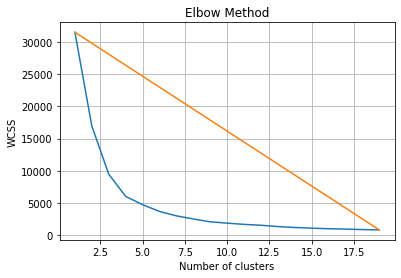

In [9]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.plot([1, 19],[wcss[0], wcss[len(wcss)-1]])
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

### Pergunta 4: 
##### Considere o dataset gerado a partir das instruções do enunciado. Caso o algoritmo K-Means seja executado buscando apenas 1 cluster, qual será a coordenada do centroide ao final da execução?

In [11]:
pergunta4 = KMeans(n_clusters=1, init='k-means++', max_iter=300, n_init=10)   # no próprio código acima chamamos Kmeans com 1 cluster
pergunta4.fit(X)   # puxa o KMeans com as informações que demos
pergunta4.cluster_centers_   # código para puxar o centróide do cluster - as posições no plano cartesiano

array([[ 0.02618523, -1.30384304]])

### Pergunta 5: 
##### Considere o dataset gerado a partir das instruções do enunciado. Caso o algoritmo seja executado buscando apenas 1 cluster, qual será a soma dos quadrados intra-clusters (wcss) ao final da execução?

In [13]:
pergunta5 = KMeans(n_clusters=1, init='k-means++', max_iter=300, n_init=10)  
pergunta5.fit(X)
pergunta5.inertia_    # inertia_ é a função que representa o WCSS

31547.372471390485

### Pergunta 6: 
##### Considere o dataset gerado a partir das instruções do enunciado. Caso o algoritmo seja executado buscando 5 clusters, qual será a soma dos quadrados intra-clusters (wcss) ao final da execução?

In [14]:
pergunta6 = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10)  
pergunta6.fit(X)
pergunta6.inertia_ 

4717.404091931214

### Pergunta 7: 
##### Considerando o dataset gerado a partir das instruções do enunciado. Qual o número ideal de clusters?

In [22]:
# https://stackoverflow.com/questions/56942378/modulenotfounderror-installing-yellowbrick-in-python
# https://www.scikit-yb.org/en/latest/api/cluster/elbow.html

!pip install yellowbrick

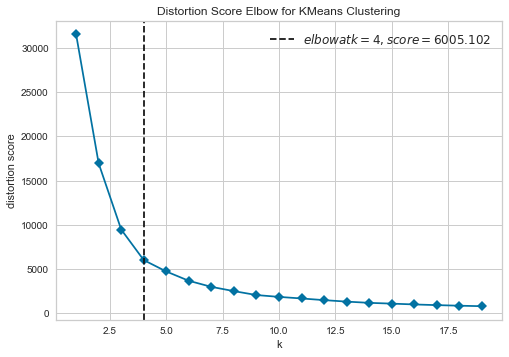

In [29]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,20), timings=False)  # k é o range que vai testar de 1 a 20, timings = False para esconder a linha de treino verde que apareceria no gráfico
visualizer.fit(X)
visualizer.show()

### Pergunta 8: 
##### Utilizando o dataset das instruções do enunciado. Ao criar um gráfico com as medidas “Confirmed”, “Deaths”, “Recovered” e “Active” apenas para a China (Mainland China), como fica o gráfico?

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [37]:
# Para ajudar a puxar um arquivo do seu PC -> https://www.youtube.com/watch?v=cd6eU5GV_8o
plt.style.use('seaborn')
covid_19 = pd.read_csv('C:/Users/pampa/Documents/JupyterNotebook/compressed_covid_19_data/covid_19_data.csv', index_col='SNo')

In [38]:
covid_19['Active'] = covid_19['Confirmed'] - (covid_19['Deaths'] + covid_19['Recovered']) # criando o total de casos ativos

In [40]:
covid_19

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Active
SNo,,,,,,,,
1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,1.0
2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0,14.0
3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0,6.0
4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,1.0
5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
62671,07/12/2020,Zacatecas,Mexico,2020-07-13 04:43:04,1394.0,137.0,932.0,325.0
62672,07/12/2020,Zakarpattia Oblast,Ukraine,2020-07-13 04:43:04,3909.0,139.0,1258.0,2512.0
62673,07/12/2020,Zaporizhia Oblast,Ukraine,2020-07-13 04:43:04,621.0,20.0,509.0,92.0


In [46]:
mainlnad_china = covid_19[covid_19['Country/Region'] == 'Mainland China'] # pegando os dados apenas da china

mainlnad_china['ObservationDate'] = pd.to_datetime(mainlnad_china['ObservationDate']).dt.date # tranformando a coluna em formato de data

mainlnad_china = mainlnad_china.groupby('ObservationDate').sum().reset_index()

C:\Users\pampa\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


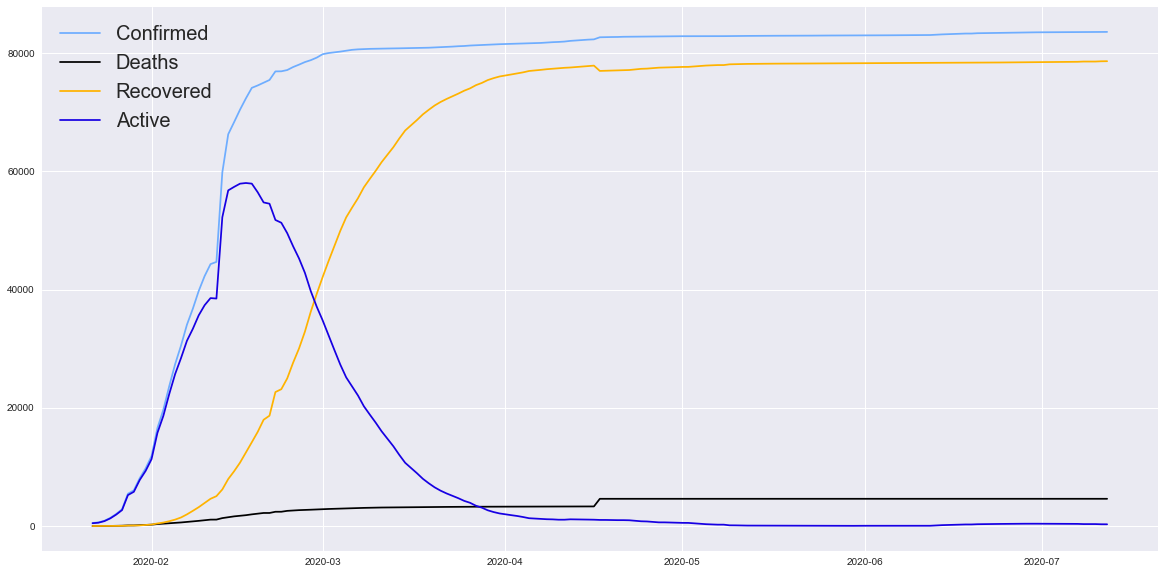

In [45]:
plt.figure(figsize=(20, 10))
plt.plot(mainlnad_china['ObservationDate'], mainlnad_china['Confirmed'], label='Confirmed', color='#6eadff')
plt.plot(mainlnad_china['ObservationDate'], mainlnad_china['Deaths'], label='Deaths', color='black')
plt.plot(mainlnad_china['ObservationDate'], mainlnad_china['Recovered'], label='Recovered', color='#ffb300')
plt.plot(mainlnad_china['ObservationDate'], mainlnad_china['Active'], label='Active', color='#1700e3')

plt.legend(loc=2, prop={'size': 20})
plt.show()

### Pergunta 9: 
##### Utilizando o dataset das instruções do enunciado. Filtre por país, selecionando a Itália (Italy), analise as informações do dataset e responda: Em que mês o país passou a ter mais casos recuperados do que casos ativos?

In [47]:
italy = covid_19[covid_19['Country/Region'] == 'Italy'] # pegando os dados apenas da Italia

italy['ObservationDate'] = pd.to_datetime(italy['ObservationDate']).dt.date # tranformando a coluna em formato de data

italy = italy.groupby('ObservationDate').sum().reset_index()

C:\Users\pampa\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


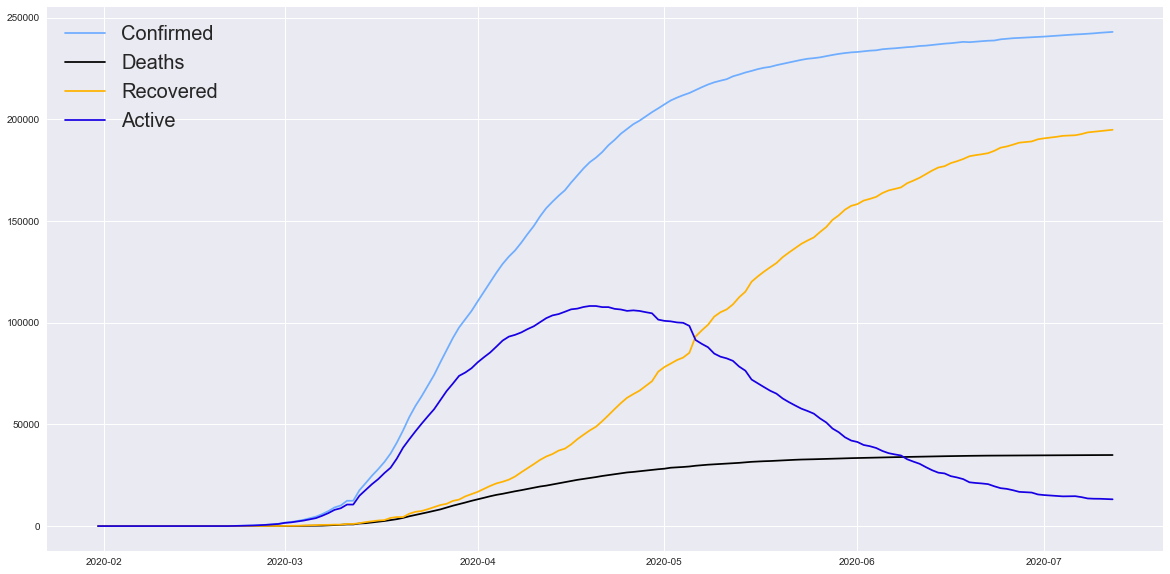

In [48]:
plt.figure(figsize=(20, 10))
plt.plot(italy['ObservationDate'], italy['Confirmed'], label='Confirmed', color='#6eadff')
plt.plot(italy['ObservationDate'], italy['Deaths'], label='Deaths', color='black')
plt.plot(italy['ObservationDate'], italy['Recovered'], label='Recovered', color='#ffb300')
plt.plot(italy['ObservationDate'], italy['Active'], label='Active', color='#1700e3')


plt.legend(loc=2, prop={'size': 20})
plt.show()

### Pergunta 10: 
##### Utilizando o dataset das instruções do enunciado. Filtre por país, selecionando a Coreia do Sul (South Korea). Em que mês esse país atingiu o pico de casos ativos?

In [51]:
south_korea = covid_19[covid_19['Country/Region'] == 'South Korea'] # pegando os dados apenas da Coreia do Sul

south_korea['ObservationDate'] = pd.to_datetime(south_korea['ObservationDate']).dt.date # tranformando a coluna em formato de data

south_korea = south_korea.groupby('ObservationDate').sum().reset_index()



C:\Users\pampa\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


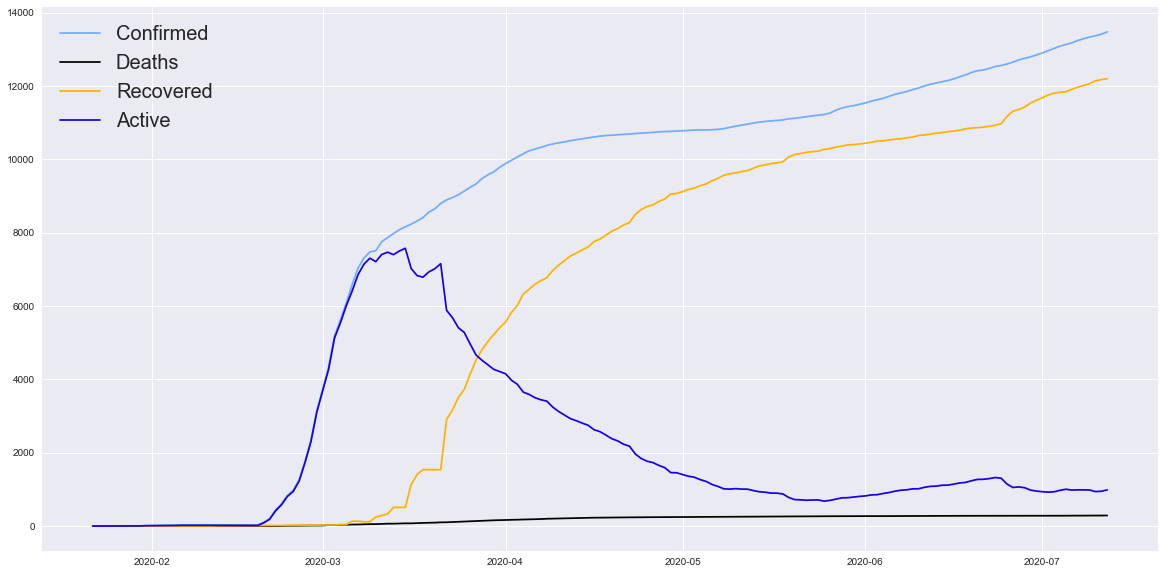

In [52]:
plt.figure(figsize=(20, 10))
plt.plot(south_korea['ObservationDate'], south_korea['Confirmed'], label='Confirmed', color='#6eadff')
plt.plot(south_korea['ObservationDate'], south_korea['Deaths'], label='Deaths', color='black')
plt.plot(south_korea['ObservationDate'], south_korea['Recovered'], label='Recovered', color='#ffb300')
plt.plot(south_korea['ObservationDate'], south_korea['Active'], label='Active', color='#1700e3')


plt.legend(loc=2, prop={'size': 20})
plt.show()

### Pergunta 11: 
##### Utilizando o dataset das instruções do enunciado. Ao criar um gráfico com a medida “Active” apenas para a Itália (Italy), como fica o gráfico?

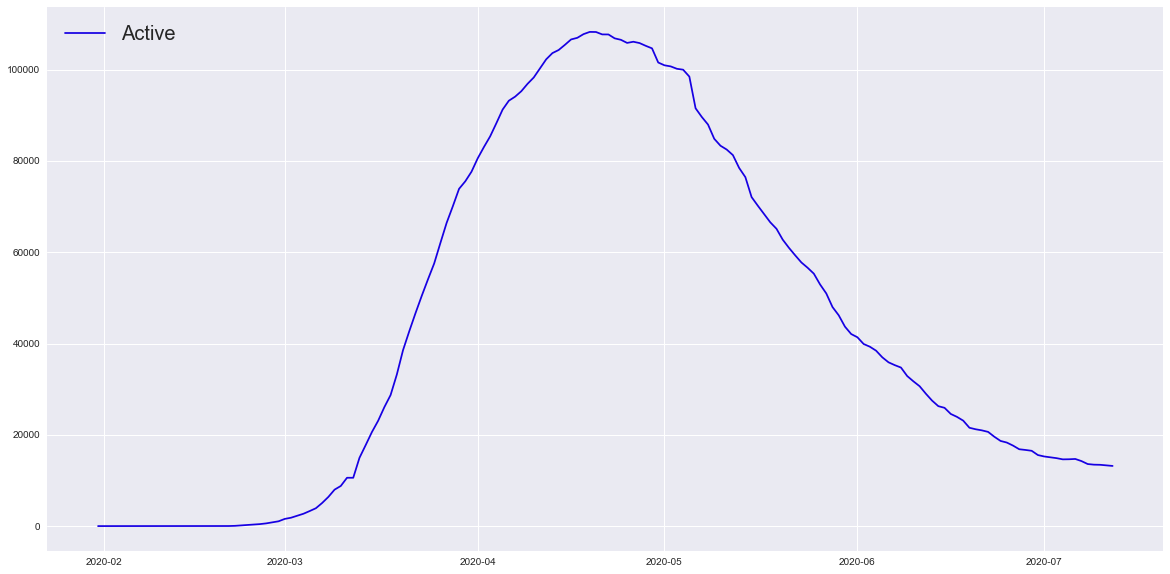

In [53]:
plt.figure(figsize=(20, 10))
plt.plot(italy['ObservationDate'], italy['Active'], label='Active', color='#1700e3')


plt.legend(loc=2, prop={'size': 20})
plt.show()

### Pergunta 12: 
##### Utilizando o dataset das instruções do enunciado. Filtre por país, selecionando a Venezuela, analise as informações, perceba que algumas vezes o número de casos recuperados foi maior que o de casos ativos. Em que mês isso ocorreu pela primeira vez?

In [54]:
venezuela = covid_19[covid_19['Country/Region'] == 'Venezuela'] # pegando os dados apenas da Coreia do Sul

venezuela['ObservationDate'] = pd.to_datetime(venezuela['ObservationDate']).dt.date # tranformando a coluna em formato de data

venezuela = venezuela.groupby('ObservationDate').sum().reset_index()

C:\Users\pampa\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


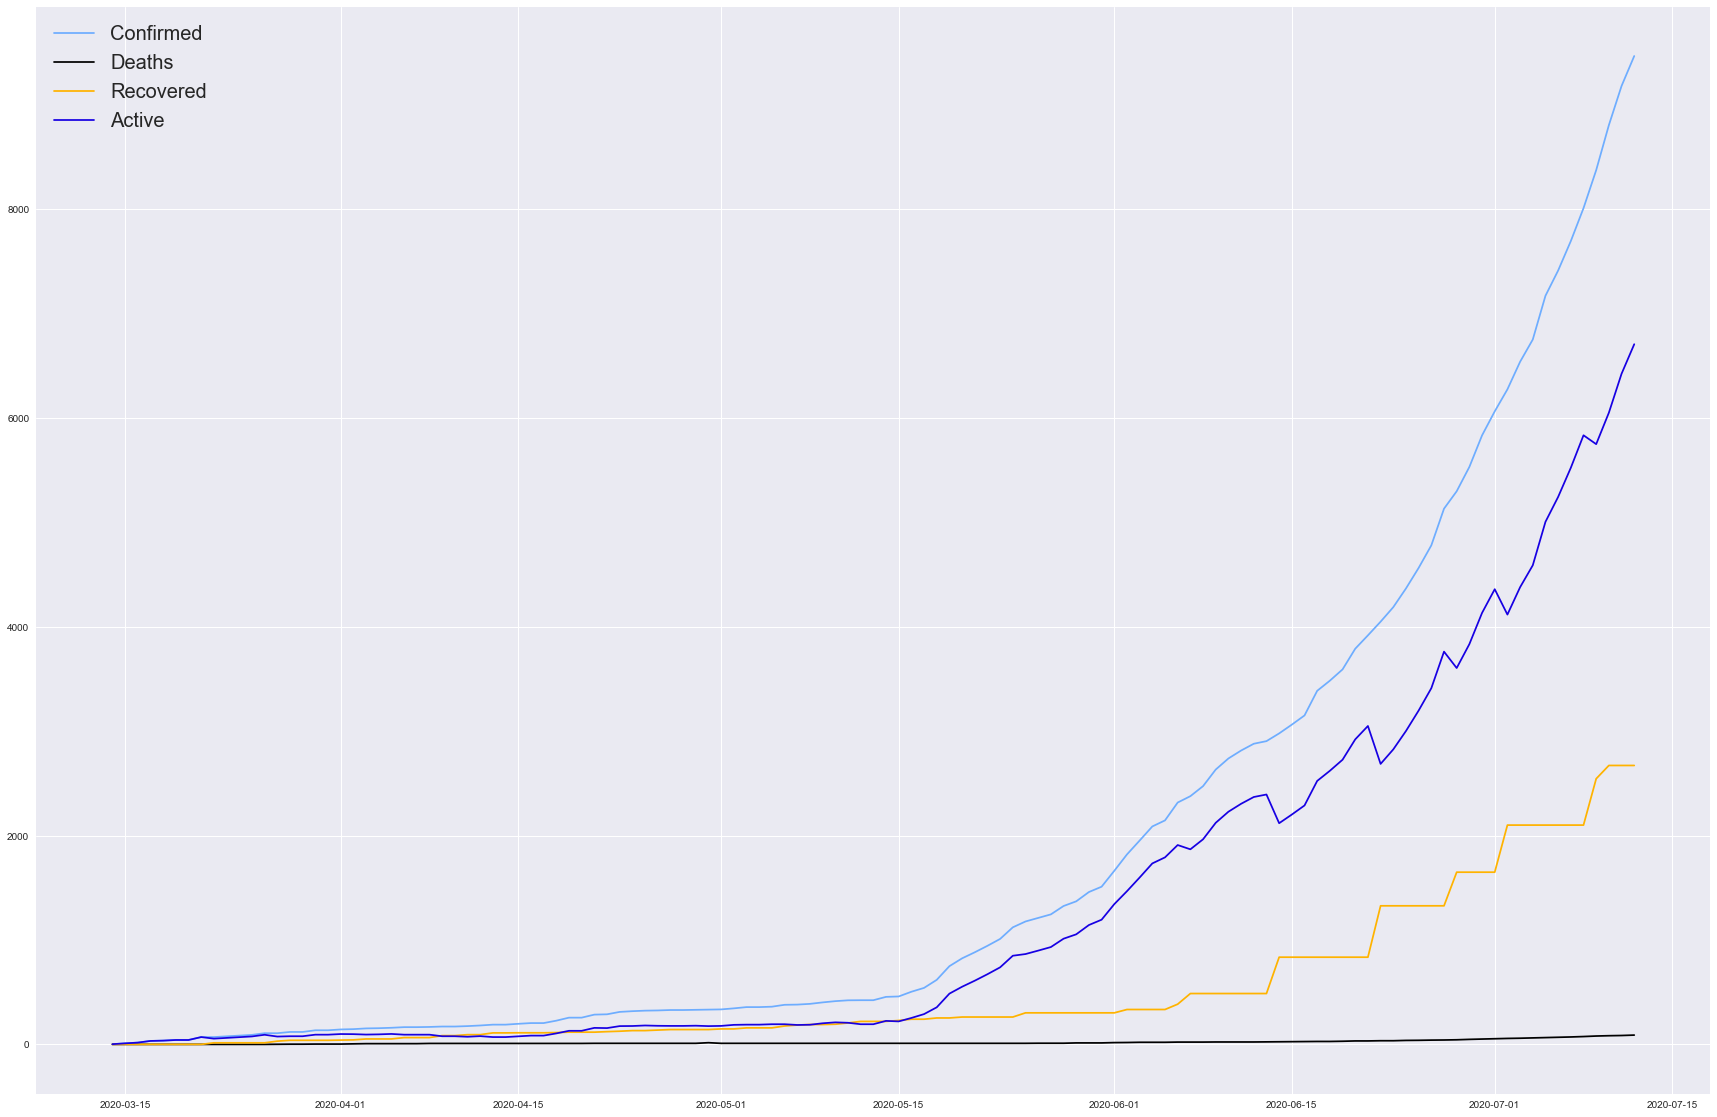

In [64]:
plt.figure(figsize=(30, 20))   # mudar o tamanho do gráfico pra ficar mais fácil de ver
plt.plot(venezuela['ObservationDate'], venezuela['Confirmed'], label='Confirmed', color='#6eadff')
plt.plot(venezuela['ObservationDate'], venezuela['Deaths'], label='Deaths', color='black')
plt.plot(venezuela['ObservationDate'], venezuela['Recovered'], label='Recovered', color='#ffb300')
plt.plot(venezuela['ObservationDate'], venezuela['Active'], label='Active', color='#1700e3')


plt.legend(loc=2, prop={'size': 20})
plt.show()